In [ ]:
!pip install igraph
# !pip install python-igraph==0.9.6   #use this for plotting graph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 20.1 MB/s eta 0:00:00


In [ ]:
# !pip install cairocffi   #use this for plotting graph


Usage:   
  pip3 uninstall [options] <package> ...
  pip3 uninstall [options] -r <requirements file> ...

no such option: -!
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached python_igraph-0.9.6-cp39-cp39-manylinux2010_x86_64.whl (3.3 MB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import igraph as ig
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from typing import Tuple

random.seed(0)

-----------------Question 1------------------------------------------

-----------Part (a)----------------------

In [ ]:
g = ig.Graph.Erdos_Renyi(n=900, p=0.015, directed=False)

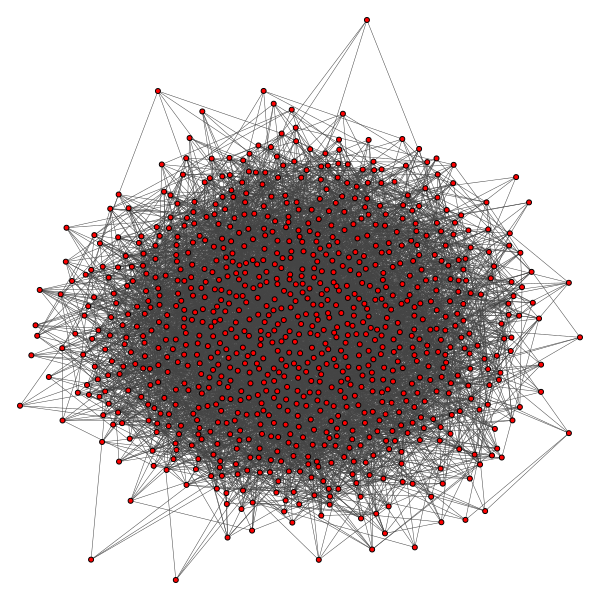

In [ ]:
   ## use this for plotting graph
# layout = g.layout('auto')
# ig.plot(g, layout=layout, vertex_size=5, edge_width=0.5, mark_groups=False)

-------------------Part (b)-------------------------------

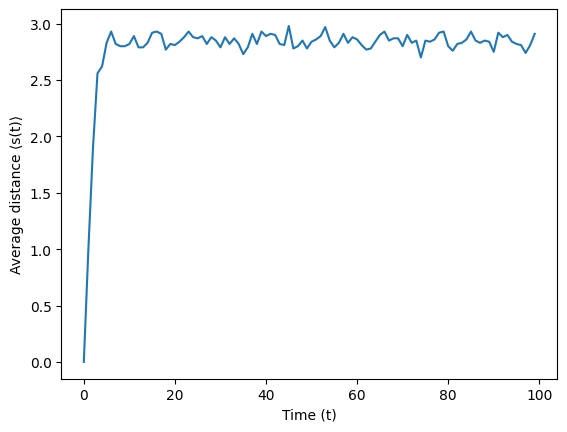

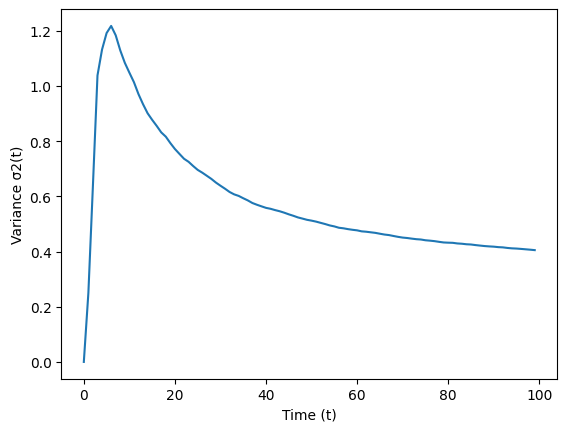

In [ ]:
# Define the number of steps and repetitions
t_max = 100
repetitions = 100

# Initialize arrays to store the results
s_avg = np.zeros(t_max)
s_var = np.zeros(t_max)

# Perform the random walks
for r in range(repetitions):
    # Select a random starting node
    start_node = np.random.randint(0, g.vcount())
    curr_node = start_node
    temp = []
    
    # Perform the random walk for each time step
    for t in range(t_max):
        # Get the shortest path length from the starting node to current node
        s = g.distances(curr_node,start_node)[0]       
        temp.append(s)
        # Calculate the average and variance of the distance
        s_avg[t] += s
        s_var[t] += np.var(temp)
        
        # Take a random step to one of the neighboring nodes
        neighbors = g.neighbors(start_node)
        if len(neighbors) > 0:
            start_node = np.random.choice(neighbors)
        
# Calculate the averages over all repetitions
s_avg /= repetitions
# s_var = (s_avg - np.mean(s_avg))**2 / repetitions
s_var /= repetitions



# Plot the results
plt.plot(s_avg)
plt.xlabel('Time (t)')
plt.ylabel('Average distance ⟨s(t)⟩')
plt.show()

plt.plot(s_var)
plt.xlabel('Time (t)')
plt.ylabel('Variance σ2(t)')
plt.show()

---------------------------Part (c)------------------------------

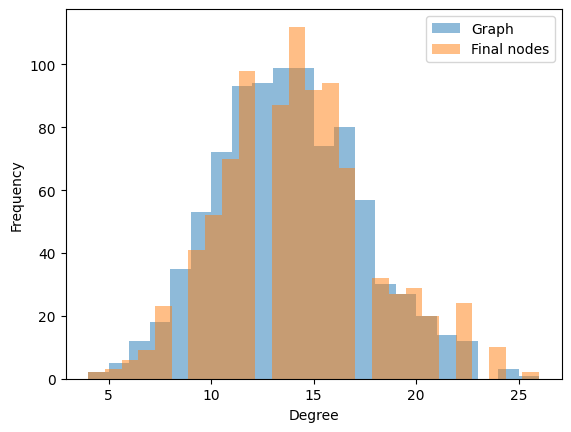

In [ ]:
# number of steps and repetitions
t_max = 100
repetitions = 900
degrees = []

# random walks
for r in range(repetitions):
    # random starting node
    start_node = np.random.randint(0, g.vcount())
    curr_node = start_node
    
    # random walk
    for t in range(t_max):
        # random step
        neighbors = g.neighbors(curr_node)
        if len(neighbors) > 0:
            curr_node = np.random.choice(neighbors)
    
    # degree of the end node
    degrees.append(g.degree(curr_node))

plt.hist(g.degree(), bins="auto", alpha=0.5, label='Graph')
plt.hist(degrees, bins="auto", alpha=0.5, label='Final nodes')

plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()

-------------------------Part (d)----------------------------

In [ ]:
g = ig.Graph.Erdos_Renyi(n=9000, p=0.015, directed=False)

In [ ]:
# layout = g.layout('auto')
# ig.plot(g, layout=layout, vertex_size=5, edge_width=0.5, mark_groups=False)

 199 199

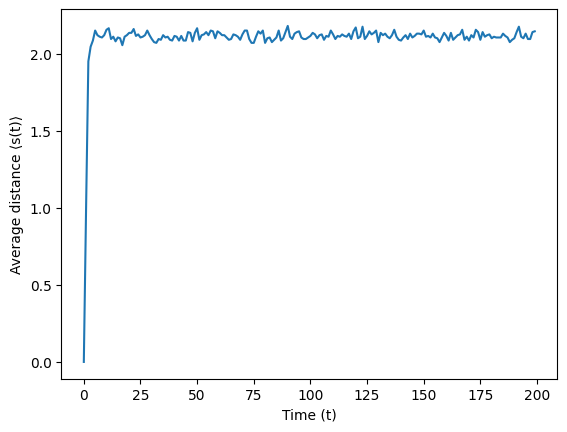

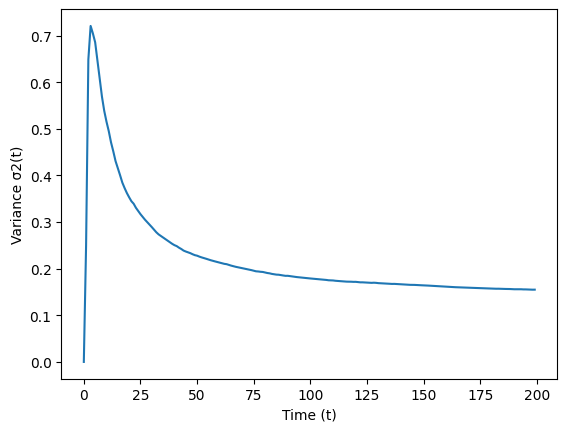

In [ ]:
# Define the number of steps and repetitions
t_max = 200
repetitions = 200

# Initialize arrays to store the results
s_avg = np.zeros(t_max)
s_var = np.zeros(t_max)
s_all = np.zeros(t_max)
# Perform the random walks
for r in range(repetitions):
    # Select a random starting node
    start_node = np.random.randint(0, g.vcount())
    curr_node = start_node
    temp = []
    # Perform the random walk for each time step
    for t in range(t_max):
        print("\r", r,t, end="")
        # Get the shortest path lengths from the starting node to all other nodes
        s = g.distances(start_node, curr_node)[0]
        
        # Calculate the average and variance of the distance
        s_avg[t] += np.mean(s)
        temp.append(s)

        #if t > 2:
        s_var[t] += np.var(temp)

        # Take a random step to one of the neighboring nodes
        neighbors = g.neighbors(start_node)
        if len(neighbors) > 0:
            start_node = np.random.choice(neighbors)
      
# Calculate the averages over all repetitions
s_avg_p = s_avg / repetitions
s_var_p = s_var / repetitions

# Plot the results
plt.plot(s_avg_p)
plt.xlabel('Time (t)')
plt.ylabel('Average distance ⟨s(t)⟩')
plt.show()

plt.plot(s_var_p)
plt.xlabel('Time (t)')
plt.ylabel('Variance σ2(t)')
plt.show()


In [ ]:
cur_deg = g.degree(start_node)

In [ ]:
total_deg = g.degree_distribution(start_node)

In [ ]:
test_deg = g.degree_distribution(start_node)

(array([1.000e+00, 3.800e+01, 3.280e+02, 1.491e+03, 2.549e+03, 2.564e+03,
        1.524e+03, 3.890e+02, 1.030e+02, 1.300e+01]),
 array([ 88. ,  97.3, 106.6, 115.9, 125.2, 134.5, 143.8, 153.1, 162.4,
        171.7, 181. ]),
 <BarContainer object of 10 artists>)

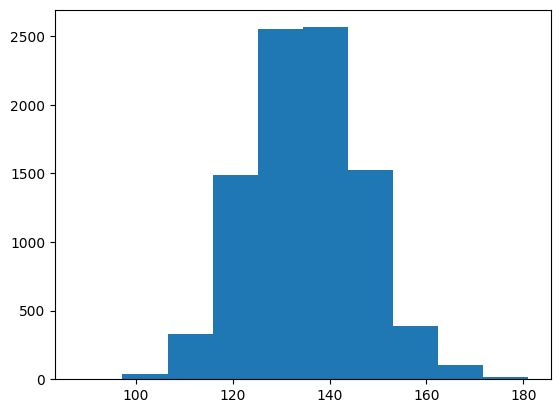

In [ ]:
plt.hist(g.degree())

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([153.5, 153.6, 153.7, 153.8, 153.9, 154. , 154.1, 154.2, 154.3,
        154.4, 154.5]),
 <BarContainer object of 10 artists>)

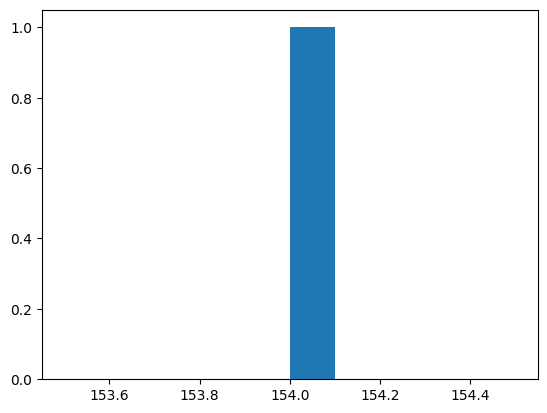

In [ ]:
plt.hist(g.degree(start_node))

In [ ]:
plt.plot(test_deg)

In [ ]:
plt.plot(cur_deg)
plt.plot(total_deg)
plt.show()

In [ ]:
s_var = (s_avg/repetitions - np.mean(s_avg/repetitions))**2 / repetitions

In [ ]:
import statistics
va = statistics.variance(s_avg)

9000


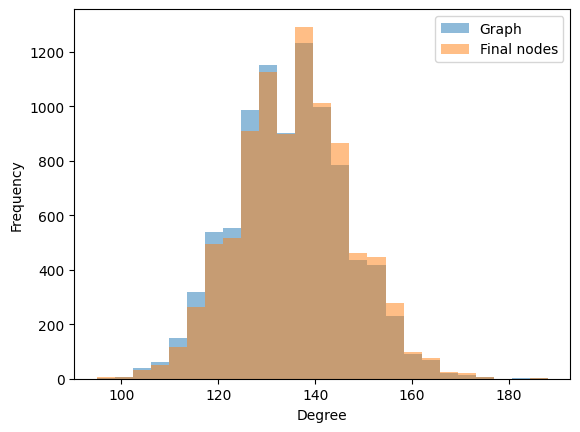

In [ ]:
# number of steps and repetitions
t_max = 50
repetitions = 9000
degrees = []

# random walks
for r in range(repetitions):
    # random starting node
    start_node = np.random.randint(0, g.vcount())
    
    # random walk
    for t in range(t_max):
        # random step
        neighbors = g.neighbors(start_node)
        if len(neighbors) > 0:
            start_node = np.random.choice(neighbors)
    
    # degree of the end node
    degrees.append(g.degree(start_node))

degrees = degrees
degrees2 = g.degree() 
print(g.vcount())

plt.hist(degrees2, bins=25, alpha=0.5, label='Graph')
plt.hist(degrees, bins=25, alpha=0.5, label='Final nodes')

plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()

 199 199

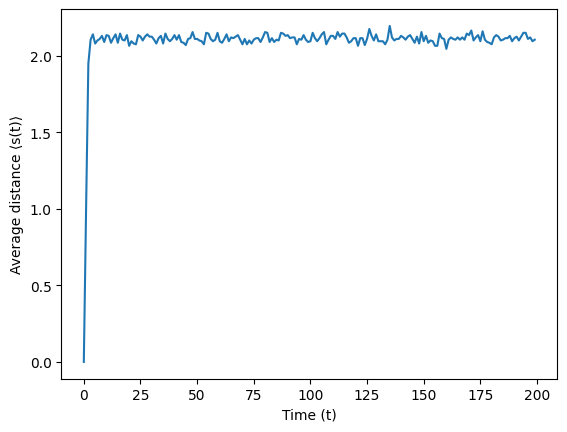

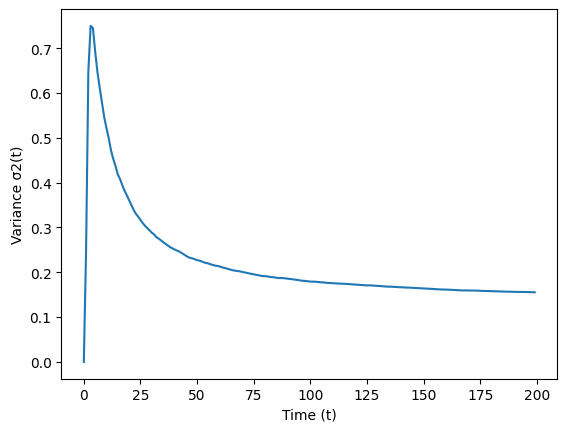

In [ ]:
g = ig.Graph.Erdos_Renyi(n=9000, p=0.015, directed=False)
# Define the number of steps and repetitions

t_max = 200
repetitions = 200

# Initialize arrays to store the results
s_avg = np.zeros(t_max)
s_var = np.zeros(t_max)
s_all = np.zeros(t_max)
# Perform the random walks
for r in range(repetitions):
    # Select a random starting node
    start_node = np.random.randint(0, g.vcount())
    curr_node = start_node
    temp = []
    # Perform the random walk for each time step
    for t in range(t_max):
        print("\r", r,t, end="")
        # Get the shortest path lengths from the starting node to all other nodes
        s = g.distances(start_node, curr_node)[0]
        
        # Calculate the average and variance of the distance
        s_avg[t] += np.mean(s)
        temp.append(s)

        #if t > 2:
        s_var[t] += np.var(temp)

        # Take a random step to one of the neighboring nodes
        neighbors = g.neighbors(start_node)
        if len(neighbors) > 0:
            start_node = np.random.choice(neighbors)
      
# Calculate the averages over all repetitions
s_avg_p = s_avg / repetitions
s_var_p = s_var / repetitions

# Plot the results
plt.plot(s_avg_p)
plt.xlabel('Time (t)')
plt.ylabel('Average distance ⟨s(t)⟩')
plt.show()

plt.plot(s_var_p)
plt.xlabel('Time (t)')
plt.ylabel('Variance σ2(t)')
plt.show()


In [ ]:
# # Add the first node
# g.add_vertex(1)

# for i in range(2, 901):
#     degrees = g.degree()
    
#     # cumulative distribution
#     cd_degrees = [sum(degrees[0:i+1]) for i in range(len(degrees))]
    
#     # random node, probability proportional to degree
#     new_edge = (i-1, ig.discrete_sequence(1, values=cd_degrees).sample()[0])
    
#     g.add_vertex(i)
#     g.add_edge(*new_edge)



In [ ]:
'''
import igraph as ig


g = ig.Graph()


g.add_vertices(2)
g.add_edge(0, 1)

# Define m = 1
m = 1

# Loop through the remaining nodes
for i in range(2, 900):
    # Choose m nodes to attach to, proportional to their degree
    probs = g.degree() / sum(g.degree())
    nodes_to_attach = list(np.random.choice(g.vcount(), size=m, replace=False, p=probs))
    
    # Add the new node and edges to the graph
    g.add_vertex(i)
    g.add_edges([(i, node) for node in nodes_to_attach])

print(f"The graph has {g.vcount()} nodes and {G.ecount()} edges.")
'''

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

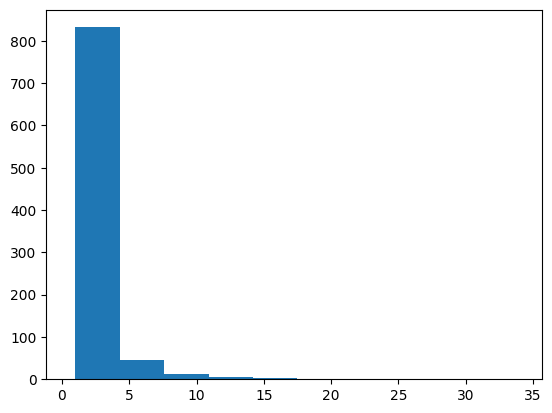

In [ ]:
plt.hist(g.degree())
plt.hist(g.degree(start_node))

---------------------Question 2-------------------------------------

----------------------Part (a) and (b)------------------------

 199 199

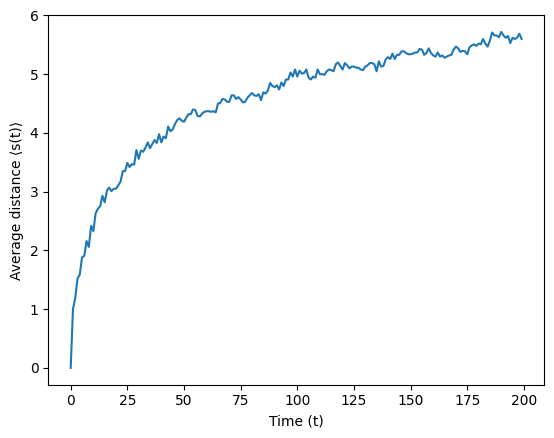

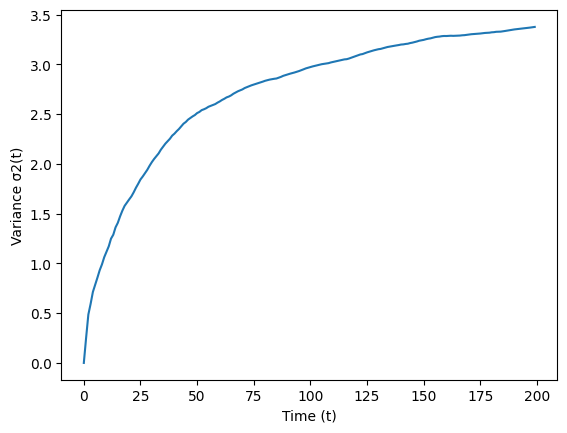

In [ ]:
g = ig.Graph.Barabasi(n=900, m=1)
t_max = 200
repetitions = 200

# Initialize arrays to store the results
s_avg = np.zeros(t_max)
s_var = np.zeros(t_max)
s_all = np.zeros(t_max)
# Perform the random walks
for r in range(repetitions):
    # Select a random starting node
    start_node = np.random.randint(0, g.vcount())
    curr_node = start_node
    temp = []
    # Perform the random walk for each time step
    for t in range(t_max):
        print("\r", r,t, end="")
        # Get the shortest path lengths from the starting node to all other nodes
        s = g.distances(start_node, curr_node)[0]
        
        # Calculate the average and variance of the distance
        s_avg[t] += np.mean(s)
        temp.append(s)

        #if t > 2:
        s_var[t] += np.var(temp)

        # Take a random step to one of the neighboring nodes
        neighbors = g.neighbors(start_node)
        if len(neighbors) > 0:
            start_node = np.random.choice(neighbors)
      
# Calculate the averages over all repetitions
s_avg_p = s_avg / repetitions
s_var_p = s_var / repetitions

# Plot the results
plt.plot(s_avg_p)
plt.xlabel('Time (t)')
plt.ylabel('Average distance ⟨s(t)⟩')
plt.show()

plt.plot(s_var_p)
plt.xlabel('Time (t)')
plt.ylabel('Variance σ2(t)')
plt.show()


---------------------Part (c)--------------------------------

(array([832.,  46.,  12.,   5.,   3.,   1.,   0.,   0.,   0.,   1.]),
 array([ 1. ,  4.3,  7.6, 10.9, 14.2, 17.5, 20.8, 24.1, 27.4, 30.7, 34. ]),
 <BarContainer object of 10 artists>)

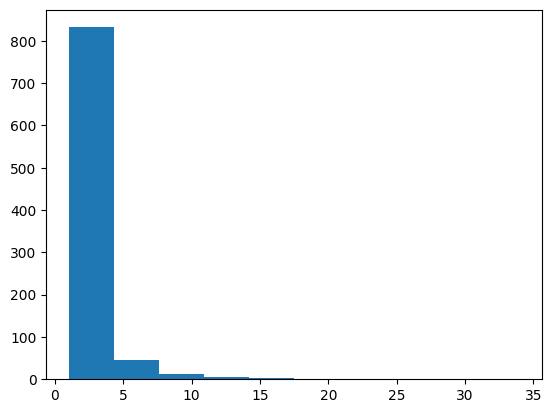

In [ ]:
plt.hist(g.degree())


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

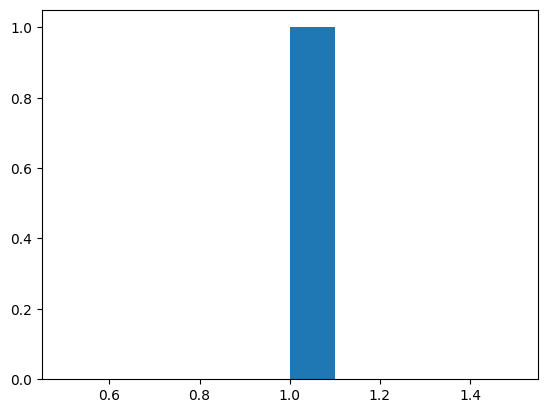

In [ ]:
plt.hist(g.degree(start_node))

------------------------Part (d)------------------------------

 199 199

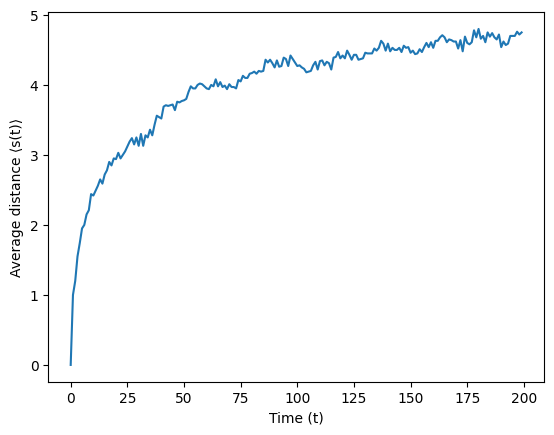

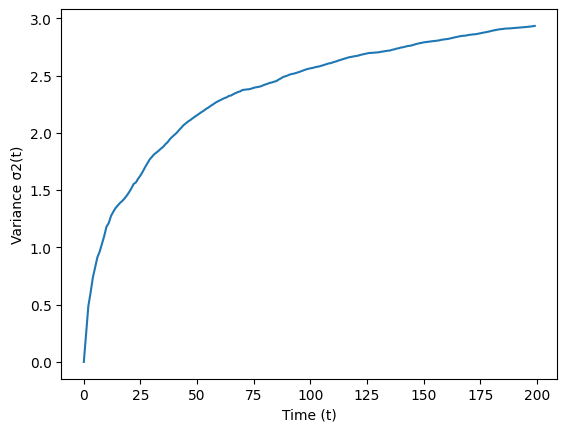

In [ ]:
g = ig.Graph.Barabasi(n=90, m=1)
t_max = 200
repetitions = 200

# Initialize arrays to store the results
s_avg = np.zeros(t_max)
s_var = np.zeros(t_max)
s_all = np.zeros(t_max)
# Perform the random walks
for r in range(repetitions):
    # Select a random starting node
    start_node = np.random.randint(0, g.vcount())
    curr_node = start_node
    temp = []
    # Perform the random walk for each time step
    for t in range(t_max):
        print("\r", r,t, end="")
        # Get the shortest path lengths from the starting node to all other nodes
        s = g.distances(start_node, curr_node)[0]
        
        # Calculate the average and variance of the distance
        s_avg[t] += np.mean(s)
        temp.append(s)

        #if t > 2:
        s_var[t] += np.var(temp)

        # Take a random step to one of the neighboring nodes
        neighbors = g.neighbors(start_node)
        if len(neighbors) > 0:
            start_node = np.random.choice(neighbors)
      
# Calculate the averages over all repetitions
s_avg_p = s_avg / repetitions
s_var_p = s_var / repetitions

# Plot the results
plt.plot(s_avg_p)
plt.xlabel('Time (t)')
plt.ylabel('Average distance ⟨s(t)⟩')
plt.show()

plt.plot(s_var_p)
plt.xlabel('Time (t)')
plt.ylabel('Variance σ2(t)')
plt.show()


 199 199

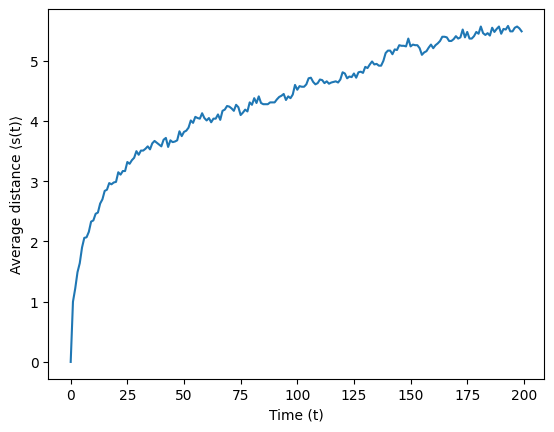

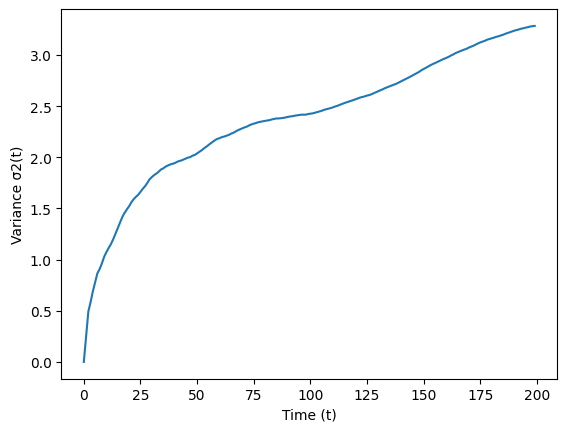

In [ ]:
g = ig.Graph.Barabasi(n=9000, m=1)
t_max = 200
repetitions = 200

# Initialize arrays to store the results
s_avg = np.zeros(t_max)
s_var = np.zeros(t_max)
s_all = np.zeros(t_max)
# Perform the random walks
for r in range(repetitions):
    # Select a random starting node
    start_node = np.random.randint(0, g.vcount())
    curr_node = start_node
    temp = []
    # Perform the random walk for each time step
    for t in range(t_max):
        print("\r", r,t, end="")
        # Get the shortest path lengths from the starting node to all other nodes
        s = g.distances(start_node, curr_node)[0]
        
        # Calculate the average and variance of the distance
        s_avg[t] += np.mean(s)
        temp.append(s)

        #if t > 2:
        s_var[t] += np.var(temp)

        # Take a random step to one of the neighboring nodes
        neighbors = g.neighbors(start_node)
        if len(neighbors) > 0:
            start_node = np.random.choice(neighbors)
      
# Calculate the averages over all repetitions
s_avg_p = s_avg / repetitions
s_var_p = s_var / repetitions

# Plot the results
plt.plot(s_avg_p)
plt.xlabel('Time (t)')
plt.ylabel('Average distance ⟨s(t)⟩')
plt.show()

plt.plot(s_var_p)
plt.xlabel('Time (t)')
plt.ylabel('Variance σ2(t)')
plt.show()
